In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading data from housing.csv file
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Total number of rows is 20640. All the columns other than total_bedrooms contain 20640 non-null values, it means there are some null values in that column.
#### As the number of null values is less comparatively, lets drop the rows with null values.

In [4]:
#Droppping the null values, keeping inplace true to make changes in original dataframe
data.dropna(inplace=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
#Importing train test split from sklearn
from sklearn.model_selection import train_test_split

In [7]:
#Creating x,y data for the model
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [8]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [11]:
train_data = X_train.join(y_train)

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13403,-117.47,34.12,6.0,10565.0,1767.0,5690.0,1555.0,4.1797,INLAND,141000.0
2410,-119.45,36.60,42.0,510.0,88.0,247.0,99.0,2.5000,INLAND,73000.0
14134,-117.07,32.75,14.0,3073.0,851.0,2000.0,782.0,2.3824,NEAR OCEAN,144700.0
6231,-117.93,34.07,36.0,1207.0,209.0,683.0,213.0,5.3559,<1H OCEAN,207300.0
16493,-121.09,38.03,21.0,2064.0,342.0,1021.0,359.0,4.5170,INLAND,152200.0
...,...,...,...,...,...,...,...,...,...,...
3429,-118.43,34.26,30.0,1246.0,373.0,1990.0,369.0,3.5104,<1H OCEAN,140900.0
3295,-122.52,38.99,16.0,975.0,219.0,337.0,155.0,1.6607,INLAND,77800.0
4087,-118.40,34.15,31.0,3881.0,909.0,1535.0,846.0,3.0398,<1H OCEAN,369100.0
4956,-118.31,34.01,52.0,2547.0,475.0,1417.0,444.0,1.8214,<1H OCEAN,123200.0


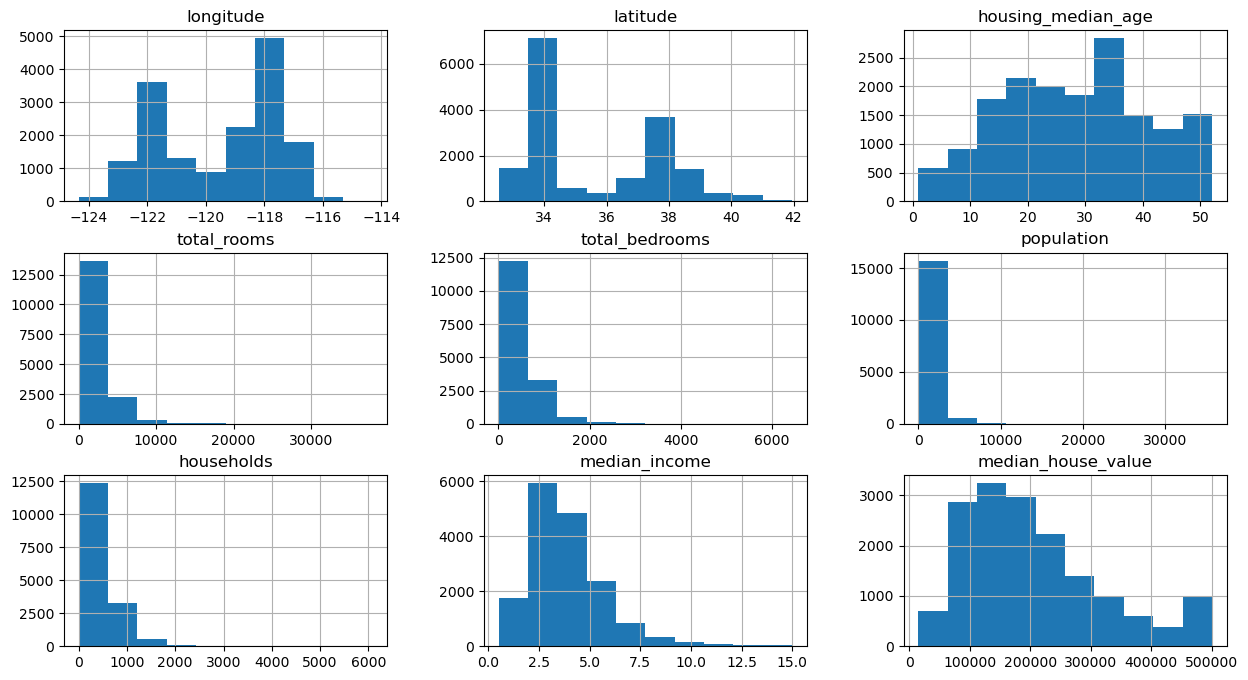

In [13]:
train_data.hist(figsize=(15,8))
plt.show()

In [14]:
train_data.drop(['ocean_proximity'], axis=1).corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924791,-0.109262,0.050025,0.073003,0.100815,0.059295,-0.014556,-0.042282
latitude,-0.924791,1.000000,0.011654,-0.039306,-0.068843,-0.108745,-0.073729,-0.078249,-0.146392
housing_median_age,-0.109262,0.011654,1.000000,-0.362802,-0.322221,-0.294045,-0.304133,-0.118274,0.109894
total_rooms,0.050025,-0.039306,-0.362802,1.000000,0.930565,0.851140,0.917241,0.193926,0.128618
total_bedrooms,0.073003,-0.068843,-0.322221,0.930565,1.000000,0.869342,0.978300,-0.011480,0.046698
population,0.100815,-0.108745,-0.294045,0.851140,0.869342,1.000000,0.900733,0.000283,-0.030591
households,0.059295,-0.073729,-0.304133,0.917241,0.978300,0.900733,1.000000,0.008978,0.061965
median_income,-0.014556,-0.078249,-0.118274,0.193926,-0.011480,0.000283,0.008978,1.000000,0.687464
median_house_value,-0.042282,-0.146392,0.109894,0.128618,0.046698,-0.030591,0.061965,0.687464,1.000000


<Axes: >

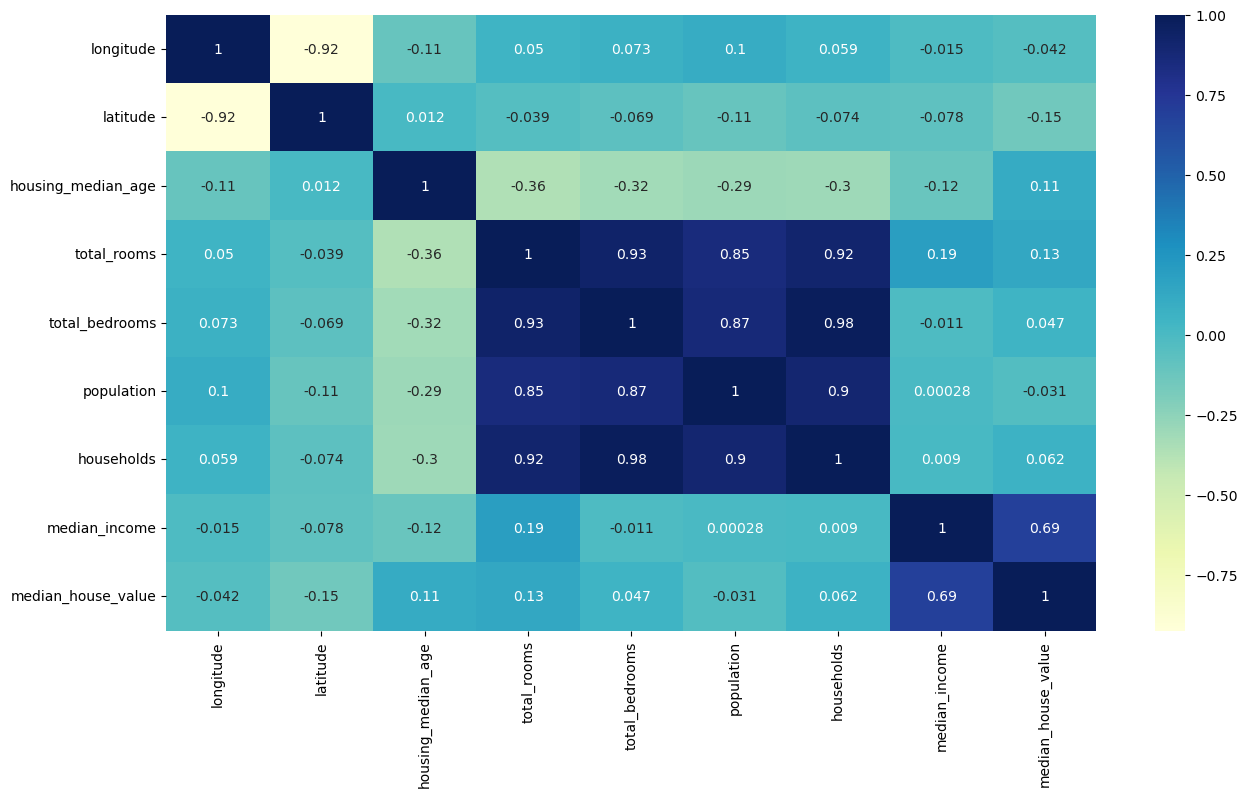

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.drop(['ocean_proximity'], axis=1).corr(), annot=True, cmap='YlGnBu')

In [16]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] * 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] * 1)
train_data['population'] = np.log(train_data['population'] * 1)
train_data['households'] = np.log(train_data['households'] * 1)

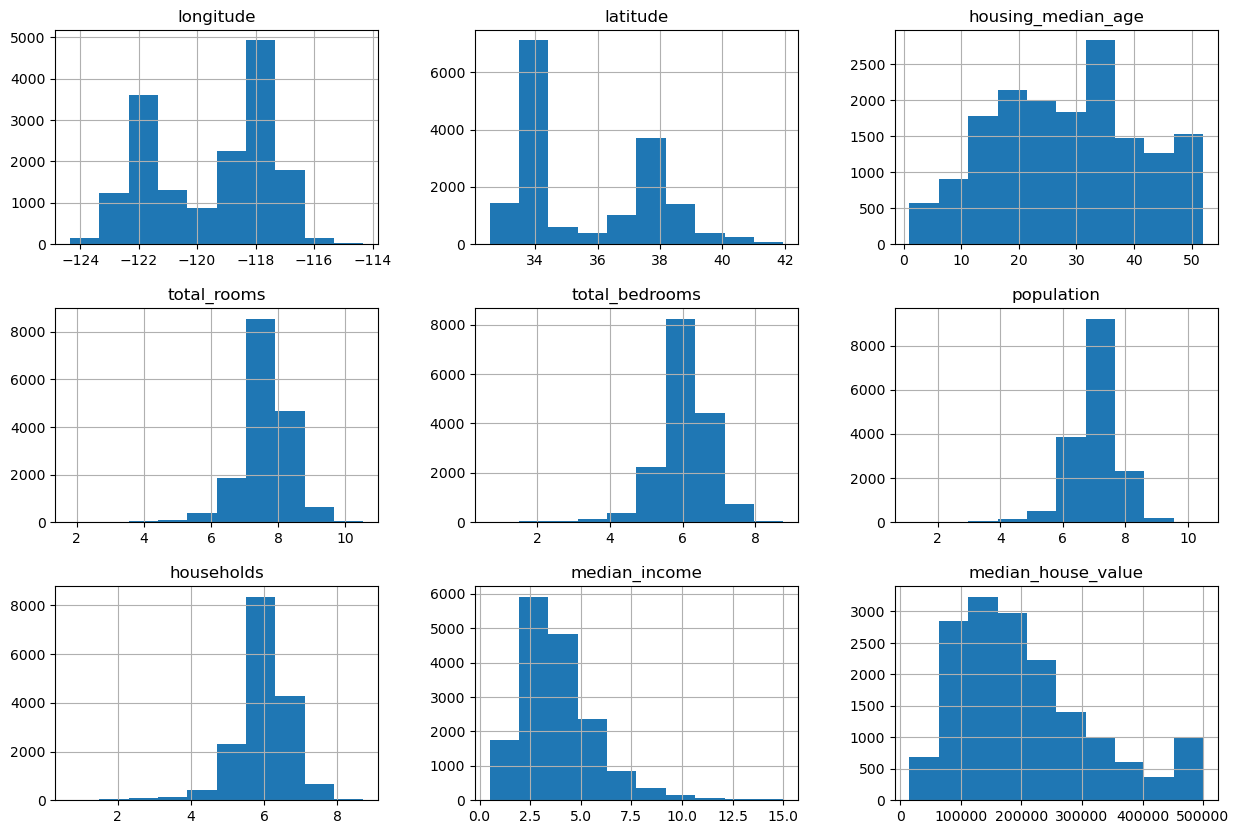

In [17]:

train_data.hist(figsize=(15,10))
plt.show()

#### Done with data exploring. Now, lets start data preprocessing.

In [18]:
#Using pandas one hot encoding
pd.get_dummies(train_data.ocean_proximity, dtype=int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13403,0,1,0,0,0
2410,0,1,0,0,0
14134,0,0,0,0,1
6231,1,0,0,0,0
16493,0,1,0,0,0
...,...,...,...,...,...
3429,1,0,0,0,0
3295,0,1,0,0,0
4087,1,0,0,0,0
4956,1,0,0,0,0


In [19]:
#Joining the dummies with training data
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13403,-117.47,34.12,6.0,9.265302,7.477038,8.646466,7.349231,4.1797,141000.0,0,1,0,0,0
2410,-119.45,36.60,42.0,6.234411,4.477337,5.509388,4.595120,2.5000,73000.0,0,1,0,0,0
14134,-117.07,32.75,14.0,8.030410,6.746412,7.600902,6.661855,2.3824,144700.0,0,0,0,0,1
6231,-117.93,34.07,36.0,7.095893,5.342334,6.526495,5.361292,5.3559,207300.0,1,0,0,0,0
16493,-121.09,38.03,21.0,7.632401,5.834811,6.928538,5.883322,4.5170,152200.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429,-118.43,34.26,30.0,7.127694,5.921578,7.595890,5.910797,3.5104,140900.0,1,0,0,0,0
3295,-122.52,38.99,16.0,6.882437,5.389072,5.820083,5.043425,1.6607,77800.0,0,1,0,0,0
4087,-118.40,34.15,31.0,8.263848,6.812345,7.336286,6.740519,3.0398,369100.0,1,0,0,0,0
4956,-118.31,34.01,52.0,7.842671,6.163315,7.256297,6.095825,1.8214,123200.0,1,0,0,0,0


<Axes: >

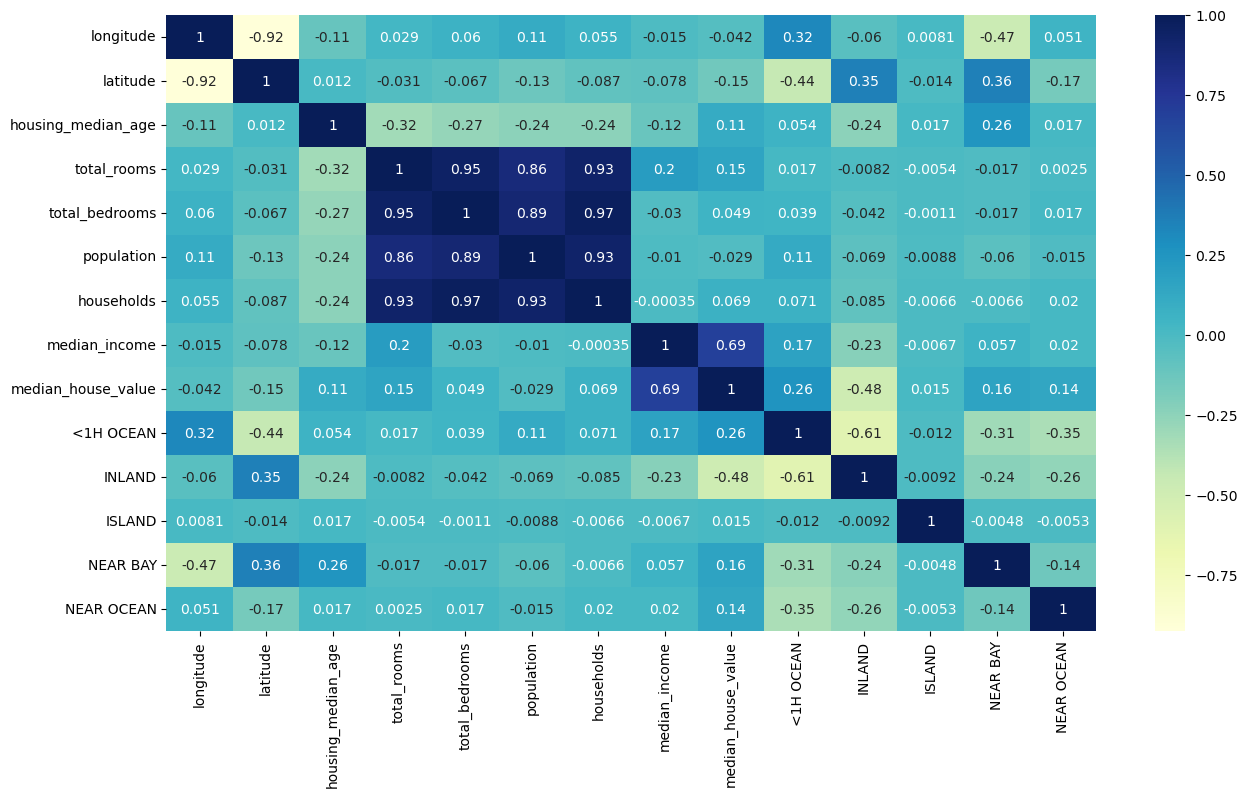

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

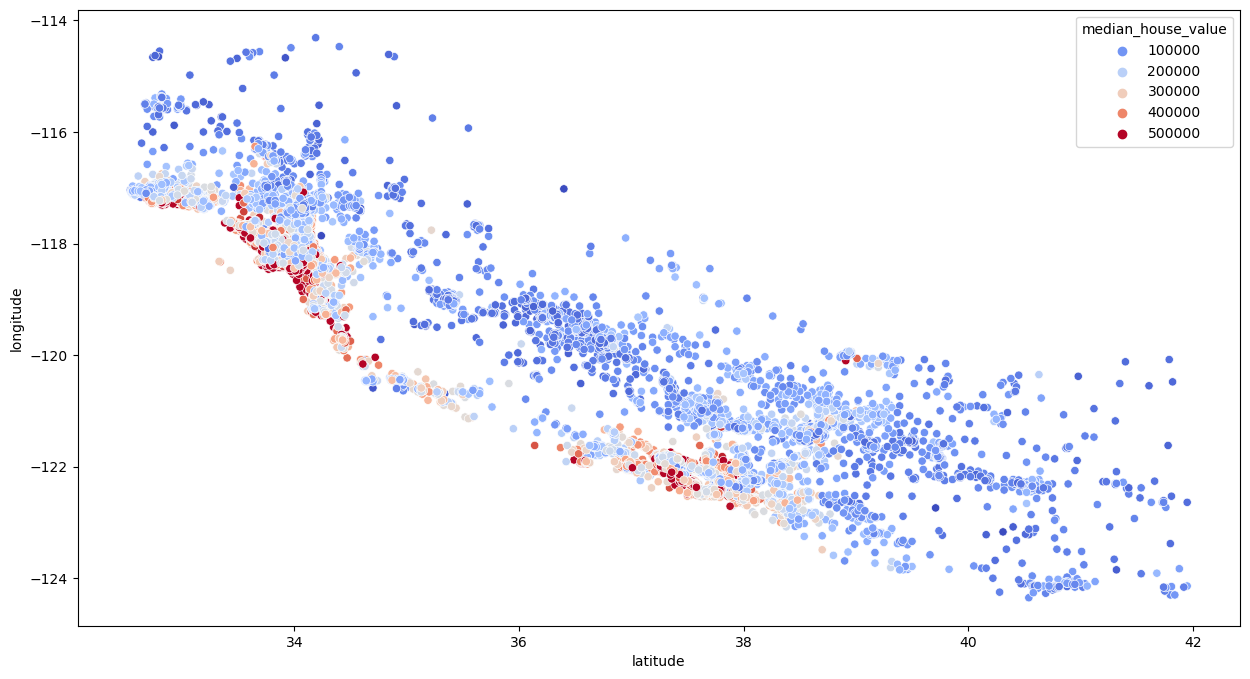

In [22]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

#### Here, we can see the houses near the coastline have higher median house value as compared to the ones in inland area.

#### Started with feature engineering

In [23]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

In [24]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
13403,-117.47,34.12,6.0,9.265302,7.477038,8.646466,7.349231,4.1797,141000.0,0,1,0,0,0,0.806994,1.260717
2410,-119.45,36.60,42.0,6.234411,4.477337,5.509388,4.595120,2.5000,73000.0,0,1,0,0,0,0.718165,1.356746
14134,-117.07,32.75,14.0,8.030410,6.746412,7.600902,6.661855,2.3824,144700.0,0,0,0,0,1,0.840108,1.205432
6231,-117.93,34.07,36.0,7.095893,5.342334,6.526495,5.361292,5.3559,207300.0,1,0,0,0,0,0.752877,1.323542
16493,-121.09,38.03,21.0,7.632401,5.834811,6.928538,5.883322,4.5170,152200.0,0,1,0,0,0,0.764479,1.297294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429,-118.43,34.26,30.0,7.127694,5.921578,7.595890,5.910797,3.5104,140900.0,1,0,0,0,0,0.830785,1.205877
3295,-122.52,38.99,16.0,6.882437,5.389072,5.820083,5.043425,1.6607,77800.0,0,1,0,0,0,0.783018,1.364636
4087,-118.40,34.15,31.0,8.263848,6.812345,7.336286,6.740519,3.0398,369100.0,1,0,0,0,0,0.824355,1.225996
4956,-118.31,34.01,52.0,7.842671,6.163315,7.256297,6.095825,1.8214,123200.0,1,0,0,0,0,0.785869,1.286564


<Axes: >

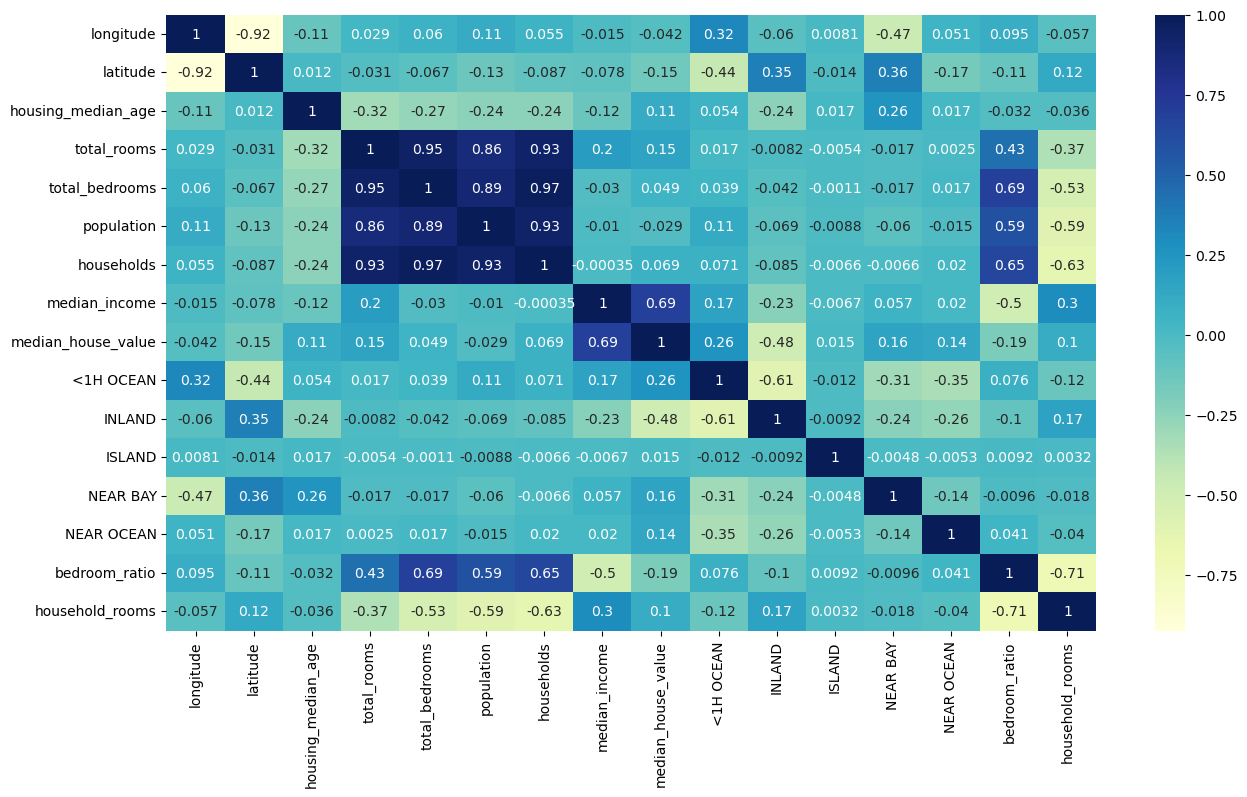

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

#### We are done with feature engineering. lets, train some models on the data. Firstly we will start with simple linear regression.

In [26]:
#Importing Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [27]:
X_train, Y_train = train_data. drop (['median_house_value'], axis= 1), train_data['median_house_value']

#X_train_s= scaler.fit_transform(X_train)


reg= LinearRegression()

reg.fit(X_train, Y_train)

LinearRegression()

In [28]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] * 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] * 1)
test_data['population'] = np.log(test_data['population'] * 1)
test_data['households'] = np.log(test_data['households'] * 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [29]:
test_data.shape

(4087, 16)

In [30]:
# np.isinf(test_data).any().any()

infinite_rows = test_data[np.isinf(test_data).any(axis=1)]
print(infinite_rows)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16171     -122.5     37.79                52.0     2.079442             0.0   

       population  households  median_income  median_house_value  <1H OCEAN  \
16171    2.564949         0.0        15.0001            500001.0          0   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  bedroom_ratio  household_rooms  
16171       0       0         1           0            0.0              inf  


In [31]:
test_data= test_data[np.isfinite(test_data).all(1)]


In [32]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [33]:
reg.score(x_test, y_test)

0.665372367183427

#### RandomForestRegression

In [34]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()